In [1]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import re
import string
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv("C:\\Users\\Shakeel Computers\\Documents\\6th\\DM\\fake_job_postings.csv")

In [3]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [4]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['fraudulent'] == 0]
df_minority = df[df['fraudulent'] == 1]

In [5]:
df_majority

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [6]:
df_minority

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,17828,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",NaN,NaN,NaN,Student Positions Part-Time and Full-Time.You ...,NaN,NaN,0,0,0,Part-time,NaN,NaN,NaN,NaN,1
17828,17829,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,NaN,NaN,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,0,0,1,NaN,NaN,NaN,NaN,NaN,1
17829,17830,Android Developer,"PL, MZ, Warsaw",NaN,NaN,NaN,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,0,0,0,NaN,NaN,NaN,NaN,NaN,1
17830,17831,Payroll Clerk,"US, NY, New York",NaN,NaN,NaN,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,0,0,0,Full-time,NaN,NaN,Apparel & Fashion,Accounting/Auditing,1


In [7]:
# Downsample majority class to 5000 samples
df_majority_downsampled = resample(df_majority,
                                   replace=False,   # Sample without replacement
                                   n_samples=5000,  # Downsample to 5000 samples
                                   random_state=1)  # Reproducible results

In [8]:
df_majority_downsampled

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
14932,14933,"Web Developer, HTML | CSS | JavaScript","US, CA, San Diego",NaN,NaN,PINT is a leader in the web industry with 20 y...,PINT is seeking an associate web developer wit...,"BS and/or Masters in CS, CogSci or Math, or eq...","PINT offers market-competitive Health, Dental,...",0,1,1,Full-time,Associate,Bachelor's Degree,Internet,Engineering,0
4969,4970,Server,"US, CA, Anaheim",NaN,NaN,True Shabu is a new restaurant in Anaheim Hill...,"Now hiring for a new fun, hip, trendy high-tra...",Servers must be over 21 years oldMust be comfo...,No benefits are offered with part-time positions.,0,1,1,Part-time,Not Applicable,High School or equivalent,Food & Beverages,NaN,0
5385,5386,Recruiter,"PH, , Makati City",HR,15000-25000,"Collabera is a fast growing, end-to-end inform...","Job Title :- RecruiterLocation :- Makati City,...","Understand technology, technical roles and tec...","Collabera is a fast growing, end-to-end inform...",0,1,0,Full-time,Not Applicable,Bachelor's Degree,Human Resources,Human Resources,0
14632,14633,Go Developer (Architecture),"US, NY, Brooklyn",Engineering,NaN,Namely is the leading end-to-end HR and payrol...,Namely is an agile startup dedicated to buildi...,"Highly desired skills:Experience building, shi...",NaN,0,1,0,Full-time,NaN,NaN,Information Technology and Services,Engineering,0
14009,14010,"SENIOR BUSINESS MANAGEMENT CONSULTANT, London","GB, LND, London",NaN,NaN,NaN,"SENIOR BUSINESS MANAGEMENT CONSULTANT, London ...","""BIG Four"" experience.Your Profile: In particu...",DOE,0,0,1,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13360,13361,Process Improvement Project Engineering Manager,"US, MI, Detroit",NaN,NaN,We Provide Full Time Permanent Positions for m...,(We have more than 1500+ Job openings in our w...,NaN,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
1079,1080,Talent Management Process Manager,"US, MN, Minneapolis",NaN,NaN,We Provide Full Time Permanent Positions for m...,(We have more than 1500+ Job openings in our w...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Management Consulting,NaN,0
17356,17357,Back End .NET Developer,"GR, I, Athens",Engineering,NaN,H WEDIA είναι μια ταχύτατα αναπτυσσόμενη ελλην...,"Μεγαλώνουμε την ομάδα μας,και χρειαζόμαστε ένα...",Πριν αποφασίσεις να μας στείλεις το βιογραφικό...,Πιστεύουμε ότι είμαστε από τις πιο δυναμικές ε...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Engineering,0
13641,13642,Business Development Rep,"US, ,",NaN,NaN,"From the lands of Can Do, Roll Our Sleeves Up ...",Apcera is completely re-imagining application ...,RESPONSIBILITIES:DESIRED QUALIFICATIONS:Talk w...,Competitive salary and stock options Great loc...,0,1,1,Full-time,NaN,NaN,NaN,NaN,0


In [9]:
# Upsample minority class to match the number of samples in the downsampled majority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,        # Sample with replacement
                                 n_samples=len(df_majority_downsampled),  
                                 # Match the number of samples in downsampled majority class
                                 random_state=1)     # Reproducible results



In [10]:
df_minority_upsampled

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
1700,1701,Cruise Staff Wanted *URGENT*,"US, NY, MANHATTAN",NaN,NaN,NaN,6* Ultra Luxury American Cruise Company is urg...,Certification &amp; Experience: Previous exper...,Benefits: On board en suite accommodation and ...,0,0,0,Full-time,NaN,NaN,"Leisure, Travel & Tourism",NaN,1
5688,5689,Call Center Representative,"US, TX, HOUSTON",NaN,1000-2000,NaN,Duties and Responsibilities:Answer Call Center...,QUALIFICATIONSHigh school diploma/GED required...,Compensation/benefits package includes:Compreh...,0,0,0,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,1
2379,2380,Administrative Assistant/Receptionist,"US, FL, MIAMI",NaN,1000-1000,NaN,Professionally and courteously answers incomin...,Minimum qualifications:High School Diploma or ...,Compensation/benefits package includes:Compreh...,0,0,0,Full-time,Entry level,High School or equivalent,Consumer Services,Accounting/Auditing,1
17733,17734,Payroll Processor Entry Clerk Position - $50/Hr,"US, SC, Abbeville",NaN,250000-500000,NaN,"Preparing all sorts of source documents, ident...",Minimum Qualifications:• High Scho...,Follows set procedures and meets specific thro...,0,0,0,Full-time,Entry level,High School or equivalent,Financial Services,Administrative,1
17681,17682,Manufacturing Engineer,"US, ,",NaN,NaN,NaN,"Engineering: 100% Employee Owned Windings, Inc...",Qualified applicants should have a BS Manufact...,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,12312,Customer Service position,"US, NY, New York",NaN,44000-102000,Fab is the place to discover the most exciting...,Fab is a fast growing e-commerce company that ...,- we need independent-minded and innovative bu...,Your compensation package includes a gross sal...,0,1,1,Part-time,Entry level,NaN,Design,Customer Service,1
17653,17654,Senior JavaScript Developer,"US, IN, Bloomington",Product Development,NaN,NaN,RideAmigos is hiring a senior level JavaScript...,This position is for a senior developer focuse...,"This is a full time, salaried position. Let us...",0,1,1,NaN,NaN,NaN,NaN,NaN,1
17591,17592,Home Based Payroll Typist/Data Entry Clerks Po...,"US, MT, Absarokee",Clerical,NaN,NaN,We have several openings available in this are...,"Basic computer and typing skills, ability to s...",All you need is access to the Internet and you...,0,0,0,NaN,NaN,NaN,NaN,NaN,1
6564,6565,Accounting Clerk,"US, TX, AUSTIN",ACCT,28000-32000,As the industry’s largest supply contracting c...,"Job DescriptionVerify, obtain approvals and pa...",High School diploma requiredProficient in usin...,"401K, HEALTHCARE PALNS AND MORE",0,1,1,Full-time,Associate,High School or equivalent,Accounting,Customer Service,1


In [11]:
# Combine downsampled majority class with upsampled minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority_upsampled])

# Shuffle the DataFrame
df_balanced = df_balanced.sample(frac=1, random_state=1).reset_index(drop=True)

In [12]:
df_balanced

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,6962,Food and Beverage Manager,"MY, ,",NaN,NaN,NaN,You will be responsible for directing the outl...,"Skills Required: * Budgeting, planning and ...",NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
1,15421,Sr. Project Engineer - HVAC CAD MS Office - Ri...,"US, VA, Richmond",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Sr. Project Engineer is required h...,5+ years experience with process design/ proj...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
2,4936,iOS Developer,"GR, I, Athens",NaN,NaN,Trebbble is a mobile strategy and development ...,Build native applications for the iPhone and i...,Have 2+ years experience in developing native ...,Highly competitive salaryPerformance bonusesTr...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Engineering,0
3,11870,Experienced Sales Lead,"US, CA, San Francisco",Business,NaN,Making Quality Metrics ActionableWe are revolu...,Dabo Health (#URL_564a318f6ae1c65f08f9225d48d7...,Bachelor's degree preferredPrior experience wi...,Health Insurance.Flexible time off policy; and...,0,1,0,Full-time,Executive,Bachelor's Degree,Hospital & Health Care,Sales,0
4,5521,Home Based Payroll Typist/Data Entry Clerks Po...,"US, NE, Abie",Clerical,NaN,NaN,We have several openings available in this are...,"Basic computer and typing skills, ability to s...",All you need is access to the Internet and you...,0,0,0,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7605,Product Specialist,"US, VA, Richmond",NaN,NaN,"We're artists, thinkers, and doers in an open,...","The Product Specialist provides prompt, proact...","Exceptional verbal, written communication, and...",NaN,0,1,0,Full-time,Entry level,Bachelor's Degree,Computer Software,Product Management,0
9996,17784,administrative assistant,"US, MD, Baltimore",admin,15-19,NaN,Giromax technology is currently looking for...,-Some College-VERY Detail Oriented and well or...,Competitive pay &amp; benefitsExcellent on-boa...,0,0,0,Full-time,Entry level,NaN,Accounting,Administrative,1
9997,8614,Licensed Practical Nurse (LPN),"US, NY, Farmingdale",NaN,NaN,"For over 20 years NAC Marketing Company, LLC d...",In-house health compliance expertAnswer calls ...,Minimum LPN (Licensed Practical Nurse) current...,Flexible HoursDirect Deposit,0,1,0,Part-time,Mid-Senior level,Bachelor's Degree,Consumer Goods,Legal,0
9998,17613,Urgent Jobs (Part Time Workers Needed),"AU, NSW, Sydney",NaN,NaN,NaN,Urgent Jobs (Part Time Workers Needed)You can ...,No any experience required.,NaN,0,0,0,Part-time,NaN,NaN,NaN,NaN,1


In [13]:
word_vectors = api.load("glove-wiki-gigaword-100")

In [14]:
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase
    text = text.lower()
    # Split text into tokens
    tokens = text.split()
    # Filter out tokens that are not in the GloVe vocabulary
    tokens = [word for word in tokens if word in word_vectors.key_to_index]
    return tokens

In [15]:
df_balanced['full_text'] = df_balanced['title'] + ' ' + df_balanced['company_profile'] + ' ' + df_balanced['description'] + ' ' + df_balanced['requirements'] + ' ' + df_balanced['benefits']

In [16]:
# Drop rows with NaN values in the 'full_text' column
df_balanced.dropna(subset=['full_text'], inplace=True)
# Convert non-string entries in 'full_text' column to strings
df_balanced['full_text'] = df_balanced['full_text'].astype(str)

In [17]:
df_balanced['full_text']

2       iOS Developer Trebbble is a mobile strategy an...
3       Experienced Sales Lead Making Quality Metrics ...
11      Associate Product Manager Want to build a 21st...
12      Production Engineer Aker Solutions is a global...
13      Manufacturing Technician PowerbyProxi and its ...
                              ...                        
9991    Customer Service Representative Gary Cartwrigh...
9992    Customer Service Reps Needed For Expansion LEI...
9994    Client Service Manager Aptitude Staffing Solut...
9997    Licensed Practical Nurse (LPN) For over 20 yea...
9999    Sales Positions - NZ EROAD was established to ...
Name: full_text, Length: 3806, dtype: object

In [18]:
# Apply preprocessing to 'full_text'
df_balanced['tokens'] = df_balanced['full_text'].apply(preprocess_text)

In [19]:
df_balanced['tokens']

2       [ios, developer, is, a, mobile, strategy, and,...
3       [experienced, sales, lead, making, quality, me...
11      [associate, product, manager, want, to, build,...
12      [production, engineer, aker, solutions, is, a,...
13      [manufacturing, technician, and, its, customer...
                              ...                        
9991    [customer, service, representative, gary, cart...
9992    [customer, service, reps, needed, for, expansi...
9994    [client, service, manager, aptitude, staffing,...
9997    [licensed, practical, nurse, lpn, for, over, 2...
9999    [sales, positions, nz, was, established, to, m...
Name: tokens, Length: 3806, dtype: object

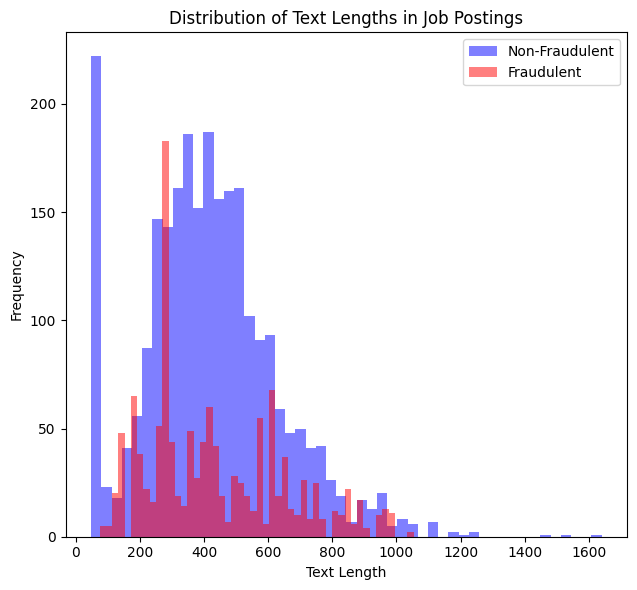

In [20]:
# Data visualization
plt.figure(figsize=(18, 6))

# Distribution of text lengths in job postings
plt.subplot(1, 3, 1)
df_balanced['text_length'] = df_balanced['full_text'].apply(lambda x: len(x.split()))
plt.hist(df_balanced[df_balanced['fraudulent'] == 0]['text_length'], bins=50, color='blue', alpha=0.5, label='Non-Fraudulent')
plt.hist(df_balanced[df_balanced['fraudulent'] == 1]['text_length'], bins=50, color='red', alpha=0.5, label='Fraudulent')
plt.title('Distribution of Text Lengths in Job Postings')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

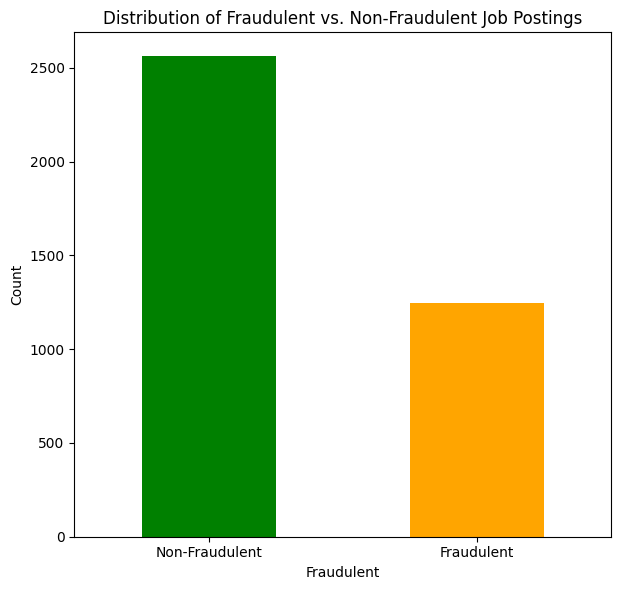

In [31]:
# Data visualization
plt.figure(figsize=(18, 6))
# Distribution of fraudulent vs. non-fraudulent job postings
plt.subplot(1, 3, 2)
df_balanced['fraudulent'].value_counts().plot(kind='bar', color=['green', 'orange'])
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Job Postings')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'], rotation=0)
plt.tight_layout()
plt.show()

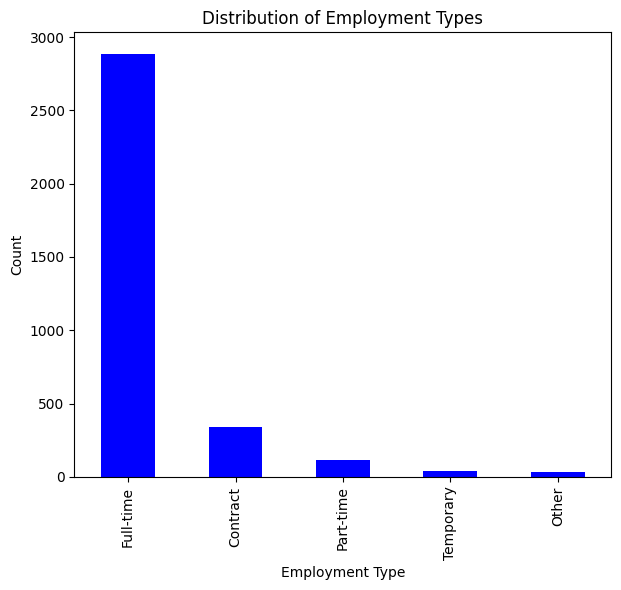

In [32]:
# Data visualization
plt.figure(figsize=(18, 6))
# Distribution of employment types
plt.subplot(1, 3, 3)
df_balanced['employment_type'].value_counts().plot(kind='bar', color='blue')
plt.title('Distribution of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [23]:
# Splitting into train and test sets
train_data, test_data = train_test_split(df_balanced, test_size=0.2, random_state=42, shuffle=True)

# Splitting train data into train and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42,shuffle=True)

# Resetting index for all datasets
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

# Checking the shapes of the datasets
print("Train data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (2435, 21)
Validation data shape: (609, 21)
Test data shape: (762, 21)


In [24]:
# Define function to convert tokens to embeddings
def tokens_to_embeddings(tokens):
    embeddings = [word_vectors[word] for word in tokens]
    return np.array(embeddings)

# Define maximum sequence length
max_sequence_length = 100

# Convert tokens to padded sequences
X_train = pad_sequences(train_data['tokens'].apply(tokens_to_embeddings).tolist(), maxlen=max_sequence_length)
X_val = pad_sequences(val_data['tokens'].apply(tokens_to_embeddings).tolist(), maxlen=max_sequence_length)
X_test = pad_sequences(test_data['tokens'].apply(tokens_to_embeddings).tolist(), maxlen=max_sequence_length)

In [25]:
# Convert tokens to padded sequence = pad_sequences(train_data['tokens'].apply(tokens_to_embeddings).tolist(), maxlen=max_sequence_length)
y_train = train_data['fraudulent']
y_test = test_data['fraudulent']
y_val = val_data['fraudulent']

In [26]:
# Define and compile the model
model = models.Sequential([
    layers.Flatten(input_shape=(max_sequence_length, 100)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=20, batch_size=24, validation_data=(X_val, y_val), verbose=2)

Epoch 1/20
102/102 - 3s - loss: 0.3145 - accuracy: 0.8694 - val_loss: 0.0817 - val_accuracy: 0.9852 - 3s/epoch - 32ms/step
Epoch 2/20
102/102 - 2s - loss: 0.0539 - accuracy: 0.9893 - val_loss: 0.0239 - val_accuracy: 0.9934 - 2s/epoch - 15ms/step
Epoch 3/20
102/102 - 2s - loss: 0.0207 - accuracy: 0.9971 - val_loss: 0.0145 - val_accuracy: 0.9967 - 2s/epoch - 16ms/step
Epoch 4/20
102/102 - 2s - loss: 0.0106 - accuracy: 0.9984 - val_loss: 0.0126 - val_accuracy: 0.9967 - 2s/epoch - 17ms/step
Epoch 5/20
102/102 - 2s - loss: 0.0082 - accuracy: 0.9992 - val_loss: 0.0117 - val_accuracy: 0.9967 - 2s/epoch - 16ms/step
Epoch 6/20
102/102 - 2s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 0.9967 - 2s/epoch - 17ms/step
Epoch 7/20
102/102 - 2s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9951 - 2s/epoch - 16ms/step
Epoch 8/20
102/102 - 2s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 0.9967 - 2s/epoch - 18ms/step
Epoch 9/20
102/1

77/77 [==============================] - 1s 6ms/step


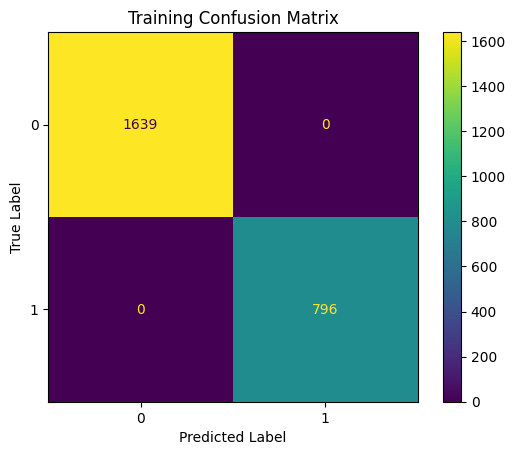

In [28]:

# Assuming you have a sequential model named 'model'

# Get predicted probabilities for each class
y_train_pred_probs = model.predict(X_train)

# Convert probabilities to class predictions (assuming binary classification)
y_train_pred = (y_train_pred_probs > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Assuming binary classification labels
disp.plot()
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

24/24 [==============================] - 0s 6ms/step


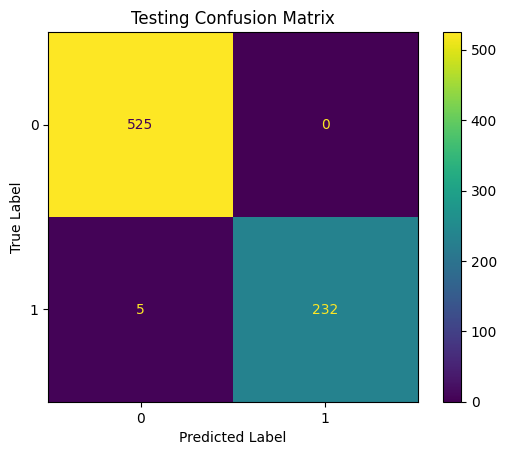

In [29]:
# Assuming you have a sequential model named 'model'

# Get predicted probabilities for each class on the test set
y_test_pred_probs = model.predict(X_test)

# Convert probabilities to class predictions (assuming binary classification)
y_test_pred = (y_test_pred_probs > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Assuming binary classification labels
disp.plot()
plt.title('Testing Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
# train_precision = precision_score(y_train, y_train_pred)
# train_recall = recall_score(y_train, y_train_pred)
# train_f1 = f1_score(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy}")
# print(f"Training Precision: {train_precision}")
# print(f"Training Recall: {train_recall}")
# print(f"Training F1 Score: {train_f1}")

# Validation metrics
y_val_pred_probs = model.predict(X_val)
y_val_pred = (y_val_pred_probs > 0.5).astype(int)

val_accuracy = accuracy_score(y_val, y_val_pred)
# val_precision = precision_score(y_val, y_val_pred)
# val_recall = recall_score(y_val, y_val_pred)
# val_f1 = f1_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy}")
# print(f"Validation Precision: {val_precision}")
# print(f"Validation Recall: {val_recall}")
# print(f"Validation F1 Score: {val_f1}")

# Testing metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
# test_precision = precision_score(y_test, y_test_pred)
# test_recall = recall_score(y_test, y_test_pred)
# test_f1 = f1_score(y_test, y_test_pred)

print(f"Testing Accuracy: {test_accuracy}")
# print(f"Testing Precision: {test_precision}")
# print(f"Testing Recall: {test_recall}")
# print(f"Testing F1 Score: {test_f1}")


Training Accuracy: 1.0
20/20 [==============================] - 0s 5ms/step
Validation Accuracy: 0.9950738916256158
Testing Accuracy: 0.9934383202099738
